# Imports

In [ ]:
pip install symlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/msyriac/orphics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/msyriac/orphics to /tmp/pip-req-build-lja9tlo6
  Running command git clone -q https://github.com/msyriac/orphics /tmp/pip-req-build-lja9tlo6
  Created wheel for orphics: filename=orphics-0.1-py3-none-any.whl size=120692 sha256=402130a7c8f005cf0c66fb72d6d3f6aca560c798e1b10a276d9fa5b586bc92d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-0xx9smfv/wheels/d7/b0/b4/f0d6f3d04253bfc28b03735977866924aef4c76289416495fe
Successfully built orphics


In [ ]:
pip install pixell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.6 MB 11.3 MB/s 
     |████████████████████████████████| 23.7 MB 33.1 MB/s 
     |████████████████████████████████| 298 kB 65.3 MB/s 
     |████████████████████████████████| 209 kB 63.9 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=a1493d52ff8ce4fcae5dd4f857eace49b16f00373bed43cf8d292e0a1e680e8c
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: pytest
    Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4


In [ ]:
pip install pyfisher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 12.4 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 1.7 MB 51.2 MB/s 
  Created wheel for camb: filename=camb-1.3.6-py3-none-any.whl size=1044376 sha256=19611cd579c60801890e939eccf6b8a508e5d0b00770cc6228469bf684b06c7e
  Stored in directory: /root/.cache/pip/wheels/c9/76/04/75619eee19c9e79112912a0548350ca594a64266277a7eb2da
  Created wheel for chainconsumer: filename=ChainConsumer-0.34.0-py3-none-any.whl size=42779 sha256=65f415a0f12a8162b547181bc01e9cef0988798b21468047d259e6019b0580f9
  Stored in directory: /root/.cache/pip/wheels/2d/e5/6c/c9b963aa8bafc25991c7ce2902ca81be7256746be0349137cf
Successfully built camb chainconsumer


In [ ]:
!git clone https://github.com/amaurea/enlib

Cloning into 'enlib'...
remote: Enumerating objects: 5064, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 5064 (delta 122), reused 154 (delta 72), pack-reused 4844
Receiving objects: 100% (5064/5064), 2.50 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (3445/3445), done.


In [ ]:
pip install healpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import healpy as hp
from pixell import enmap, utils, curvedsky, enplot, reproject
import numpy as np
import os
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from orphics import maps, cosmology
import tensorflow as tf
import numpy as np
from keras import Sequential
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from pixell.enmap import ndmap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from orphics import maps as omaps,io,catalogs as cats,stats,cosmology as cosmo
from orphics import maps
import orphics
import pixell
import scipy
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = '/content/drive/MyDrive/websky/'

## Define Directory

In [ ]:
websky_dir = "/content/drive/My Drive/websky/"
websky_path = lambda x: os.path.join(websky_dir, x)
shape, wcs = enmap.fullsky_geometry(res=1*utils.arcmin)

# Load Websky Simulations (from Database)

## Helper Function

In [ ]:
def scale(data):
  return (data - np.min(data))/(np.max(data) - np.min(data))

## Choose CMB Data

In [ ]:
# Load Target Maps (for CMB/CMB+tSZ+kSZ)
kappa_maps = np.load(data_dir + 'kap256.npy')
y = scale(kappa_maps[:50000])
del kappa_maps
y_train, y_test = train_test_split(y, test_size=0.1, random_state=0, shuffle=True)
del y

In [ ]:
# Load CMB
cmb_maps = np.load(data_dir + 'cmb256.npy')
X_pure = scale(cmb_maps) 
del cmb_maps
X_train_pure, X_test_pure = train_test_split(X_pure, test_size=0.1, random_state=0, shuffle=True)
del X_pure

In [ ]:
# Load CMB+tSZ+kSZ
noised_maps = np.load(data_dir + 'noised256.npy')
X_noised = scale(noised_maps)
del noised_maps
X_train_noised, X_test_noised = train_test_split(X_noised, test_size=0.1, random_state=0, shuffle=True)
del X_noised

In [ ]:
# Load CMB+tSZ+kSZ+Instrumentation
noised_maps_5uk = np.load(data_dir + 'cmb_noise_5uk.npy')
X_noised_5uk = scale(noised_maps_5uk)
del noised_maps_5uk
X_train_noised_5uk, X_test_noised_5uk = train_test_split(X_noised_5uk, test_size=0.1, random_state=0, shuffle=True)
del X_noised_5uk

In [ ]:
# Load Uncentered CMB and Kappa
uncentered_cmb_maps = np.load(data_dir + 'cmb_uncentered256.npy')
X_uncentered = scale(uncentered_cmb_maps) 
del uncentered_cmb_maps
X_train_uncentered, X_test_uncentered = train_test_split(X_uncentered, test_size=0.1, random_state=0, shuffle=True)
del X_uncentered

uncentered_kappa_maps = np.load(data_dir + 'kap_uncentered256.npy')
y_uncentered = scale(uncentered_kappa_maps)
del uncentered_kappa_maps
y_train_uncentered, y_test_uncentered = train_test_split(y_uncentered, test_size=0.1, random_state=0, shuffle=True)
del y_uncentered

# Define Generator Architecture (for cGAN and ResUNet)

In [ ]:
# Encoder Block
def encoder(layer_in, n_filters, batchnorm=True):
	init = RandomNormal(stddev=0.02)
	g1 = Conv2D(n_filters, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	g1 = LeakyReLU(alpha=0.2)(g1)
	g2 = Conv2D(n_filters, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(g1)
	g2 = LeakyReLU(alpha=0.2)(g1)
	
	if batchnorm:
		g2 = BatchNormalization()(g2, training=True)
	
	return g2
 
# Decoder Block
def decoder(layer_in, skip_in, n_filters, dropout=True):
	init = RandomNormal(stddev=0.02)
	g1 = Conv2DTranspose(n_filters, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	g1 = LeakyReLU(alpha=0.2)(g1)
	g2 = Conv2D(n_filters, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(g2)
	g2 = LeakyReLU(alpha=0.2)(g2)
	g2 = BatchNormalization()(g2, training=True)
	
	if dropout:
		g2 = Dropout(0.5)(g2, training=True)
	
	# Establish Skip Connections
	g2 = Concatenate()([g2, skip_in])
	g2 = Activation('relu')(g2)
	return g2
 
# Generator Architecture (to be used for cGAN and ResUNet)
def generator(image_shape=(128,128,1)):
	init = RandomNormal(stddev=0.02)
 
	# Encoding sequence
	e1 = encoder(Input(shape=image_shape), 32, batchnorm=False)
	e2 = encoder(e1, 64)
	e3 = encoder(e2, 128)
	e4 = encoder(e3, 256)
	e5 = encoder(e4, 512)
	e6 = encoder(e5, 1024)
 
	# Bottleneck Sequence
	b = Conv2D(2048, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(e6)
	b = LeakyReLU(alpha=0.2)(b)
	b = Conv2D(1024, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(b)
	b = LeakyReLU(alpha=0.2)(b)
 
	# Decoding Sequence
	d2 = decoder(b, e6, 1024, dropout=True)
	d3 = decoder(d2, e5, 512, dropout=True)
	d4 = decoder(d3, e4, 256, dropout=False)
	d5 = decoder(d4, e3, 128, dropout=False)
	d6 = decoder(d5, e2, 64, dropout=False)
	d7 = decoder(d6, e1, 32, dropout=False)
 
	# Final Sequence
	g = Conv2DTranspose(1, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	g = Activation('tanh')(g)
	
	# Define model
	model = Model(Input(shape=image_shape), g)
	return model

# Define the rest of cGAN

## Define Discriminator

In [ ]:
def discriminator(image_shape=(128,128,1)):
	init = RandomNormal(stddev=0.02)
 
  # Input K and K_pred
	pred = Input(shape=image_shape)
	truth = Input(shape=image_shape)
 
  # Define Discriminator Sequence
	d1 = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(Concatenate()([pred, truth]))
	d1 = LeakyReLU(alpha=0.2)(d1)
	d2 = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d1)
	d2 = BatchNormalization()(d2)
	d2 = LeakyReLU(alpha=0.2)(d2)
	d3 = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d2)
	d3 = BatchNormalization()(d3)
	d3 = LeakyReLU(alpha=0.2)(d3)
	d4 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d3)
	d4 = BatchNormalization()(d4)
	d4 = LeakyReLU(alpha=0.2)(d4)
	d5 = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d4)
	d5 = BatchNormalization()(d5)
	d5 = LeakyReLU(alpha=0.2)(d5)
	d6 = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d5)
	d6 = Activation('sigmoid')(d6)
	model = Model([pred, truth], d6)
 
  # Compile Model
	model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
 
	return model

## Define GAN

In [ ]:
# Borrowed from Brownlee (2021)
def cgan(g_model, d_model, image_shape):
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	in_src = Input(shape=image_shape)
	gen_out = g_model(in_src)
	dis_out = d_model([in_src, gen_out])
	model = Model(in_src, [dis_out, gen_out])
	opt = tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

## Generate real and fake samples

In [ ]:
# Borrowed from Brownlee (2021)
def generate_real_samples(X_train_pure, y_train, n_samples, patch_shape):
	trainA, trainB = X_train_pure, y_train
	ix = np.random.randint(0, trainA.shape[0], n_samples)
	X1, X2 = trainA[ix], trainB[ix]
	y = np.ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y
 
def generate_fake_samples(g_model, samples, patch_shape):
	X = g_model.predict(samples)
	y = np.zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

## Train

In [ ]:
# Borrowed from Brownlee (2021)
def train(d_model, g_model, gan_model, X_train_pure, y_train, n_epochs=100, n_batch=32):
	n_patch = d_model.output_shape[1]
	trainA, trainB = X_train_pure, y_train
	bat_per_epo = int(len(trainA) / n_batch)
	n_steps = bat_per_epo * n_epochs
	for i in range(n_steps):
		[X_realA, X_realB], y_real = generate_real_samples(X_train_pure, y_train, n_batch, n_patch)
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		if (i+1)%10 == 0:
			print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))

# Train ResUNet

In [ ]:
def custom_loss(y_true, y_pred):
    return K.mean((y_true - y_pred)**2)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=0.000001, verbose=1)
model_checkpoint = ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)

In [ ]:
resunet = define_generator()
resunet.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0002), 
             loss=custom_loss)

In [ ]:
import time
start = time.time()

history = resunet.fit(X_train_pure, y_train, batch_size=32, epochs=100, validation_split=0.1, callbacks = [reduce_lr, model_checkpoint])

end = time.time()
print(end-start)

In [ ]:
from keras.models import load_model
resunet = load_model("./keras.model", compile=False)
resunet.save(data_dir + 'resunet_uncentered')

# Train cGAN

In [ ]:
X_train_pure = X_train_uncentered.reshape((X_train_uncentered.shape[0], 128, 128, 1))
y_train = y_train_uncentered.reshape((y_train_uncentered.shape[0], 128, 128, 1))

In [ ]:
import time
start = time.time()

image_shape = X_train_pure.shape[1:]
d_model = discriminator(image_shape)
g_model = generator(image_shape)
gan_model = cgan(g_model, d_model, image_shape)
train(d_model, g_model, gan_model, X_train_pure, y_train)

end = time.time()
print(end - start)

# Compare Performance

## Load Models

In [ ]:
resunet_pure = tf.keras.models.load_model(data_dir + 'resunet_pure')
pix2pix_pure = tf.keras.models.load_model(data_dir + 'pix2pix_pure')
resunet_noised = tf.keras.models.load_model(data_dir + 'resunet_noised')
pix2pix_noised = tf.keras.models.load_model(data_dir + 'pix2pix_noised')
resunet_5uk = tf.keras.models.load_model(data_dir + 'resunet_noised_5uk', compile = False)
pix2pix_5uk = tf.keras.models.load_model(data_dir + 'pix2pix_noised_5uk', compile = False)
pix2pix_uncentered = tf.keras.models.load_model(data_dir + 'pix2pix_uncentered', compile = False)
resunet_uncentered = tf.keras.models.load_model(data_dir + 'resunet_uncentered', compile = False)

## Load Testing Data

In [ ]:
def scale(data):
  return (data - np.min(data))/(np.max(data) - np.min(data))

In [ ]:
# Load Target Maps (for CMB/CMB+tSZ+kSZ)
kappa_maps = np.load(data_dir + 'kap256.npy')
y = scale(kappa_maps[:50000])
del kappa_maps
y_train, y_test = train_test_split(y, test_size=0.1, random_state=0, shuffle=True)
del y, y_train

In [ ]:
# Load CMB
cmb_maps = np.load(data_dir + 'cmb256.npy')
X_pure = scale(cmb_maps[:50000]) 
del cmb_maps
X_train_pure, X_test_pure = train_test_split(X_pure, test_size=0.1, random_state=0, shuffle=True)
del X_pure, X_train_pure

In [ ]:
# Load CMB+tSZ+kSZ
noised_maps = np.load(data_dir + 'noised256.npy')
X_noised = scale(noised_maps)
del noised_maps
X_train_noised, X_test_noised = train_test_split(X_noised, test_size=0.1, random_state=0, shuffle=True)
del X_noised, X_train_noised

In [ ]:
# Load CMB+tSZ+kSZ+Instrumentation
noised_maps_5uk = np.load(data_dir + 'noised_5uk256.npy')
X_noised_5uk = scale(noised_maps_5uk)
del noised_maps_5uk
X_train_noised_5uk, X_test_noised_5uk = train_test_split(X_noised_5uk, test_size=0.1, random_state=0, shuffle=True)
del X_noised_5uk, X_train_noised_5uk

In [ ]:
# Load Uncentered CMB and Kappa
uncentered_cmb_maps = np.load(data_dir + 'cmb_uncentered256.npy')
X_uncentered = scale(uncentered_cmb_maps) 
del uncentered_cmb_maps
X_train_uncentered, X_test_uncentered = train_test_split(X_uncentered, test_size=0.1, random_state=0, shuffle=True)
del X_uncentered, X_train_uncentered

uncentered_kappa_maps = np.load(data_dir + 'kap_uncentered256.npy')
y_uncentered = scale(uncentered_kappa_maps)
del uncentered_kappa_maps
y_train_uncentered, y_test_uncentered = train_test_split(y_uncentered, test_size=0.1, random_state=0, shuffle=True)
del y_uncentered, y_train_uncentered

## Make Predictions

In [ ]:
# Make Predictions
y_pred_rpure = resunet_pure.predict(X_test_pure)[:, :, :, 0]
y_pred_ppure = pix2pix_pure.predict(X_test_pure)[:, :, :, 0]

y_pred_rnoised = resunet_noised.predict(X_test_noised)[:, :, :, 0]
y_pred_pnoised = pix2pix_noised.predict(X_test_noised)[:, :, :, 0]

y_pred_r5uk = resunet_5uk.predict(X_test_noised_5uk)[:, :, :, 0]
y_pred_p5uk = pix2pix_5uk.predict(X_test_noised_5uk)[:, :, :, 0]

y_pred_runcentered = resunet_uncentered.predict(X_test_uncentered)[:,:,:,0]
y_pred_puncentered = pix2pix_uncentered.predict(X_test_uncentered)[:,:,:,0]

## Visualizations

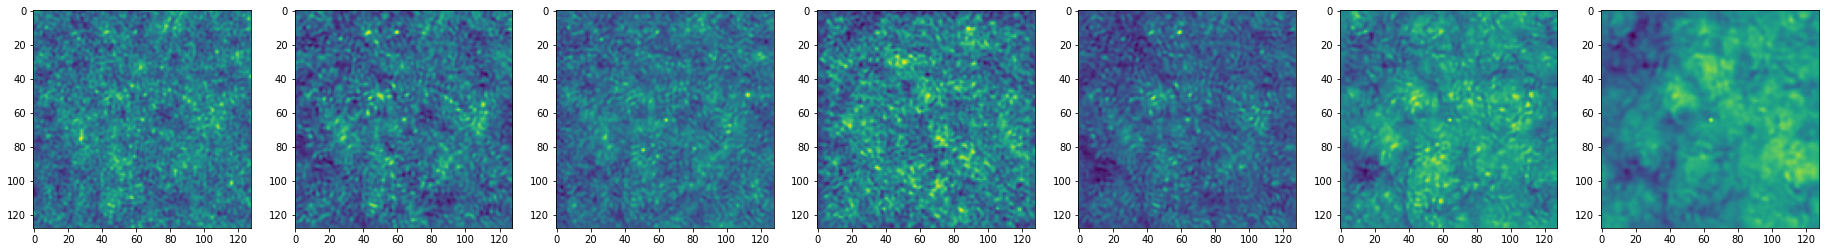

In [ ]:
fig, ax = plt.subplots(1, 7, figsize = (32,32))

idx = 4758
ax[0].imshow(y_test[idx])

ax[1].imshow(y_pred_ppure[idx])
ax[2].imshow(y_pred_pnoised[idx])
ax[3].imshow(y_pred_p5uk[idx])
ax[4].imshow(y_pred_rpure[idx])
ax[5].imshow(y_pred_rnoised[idx])
ax[6].imshow(y_pred_r5uk[idx])

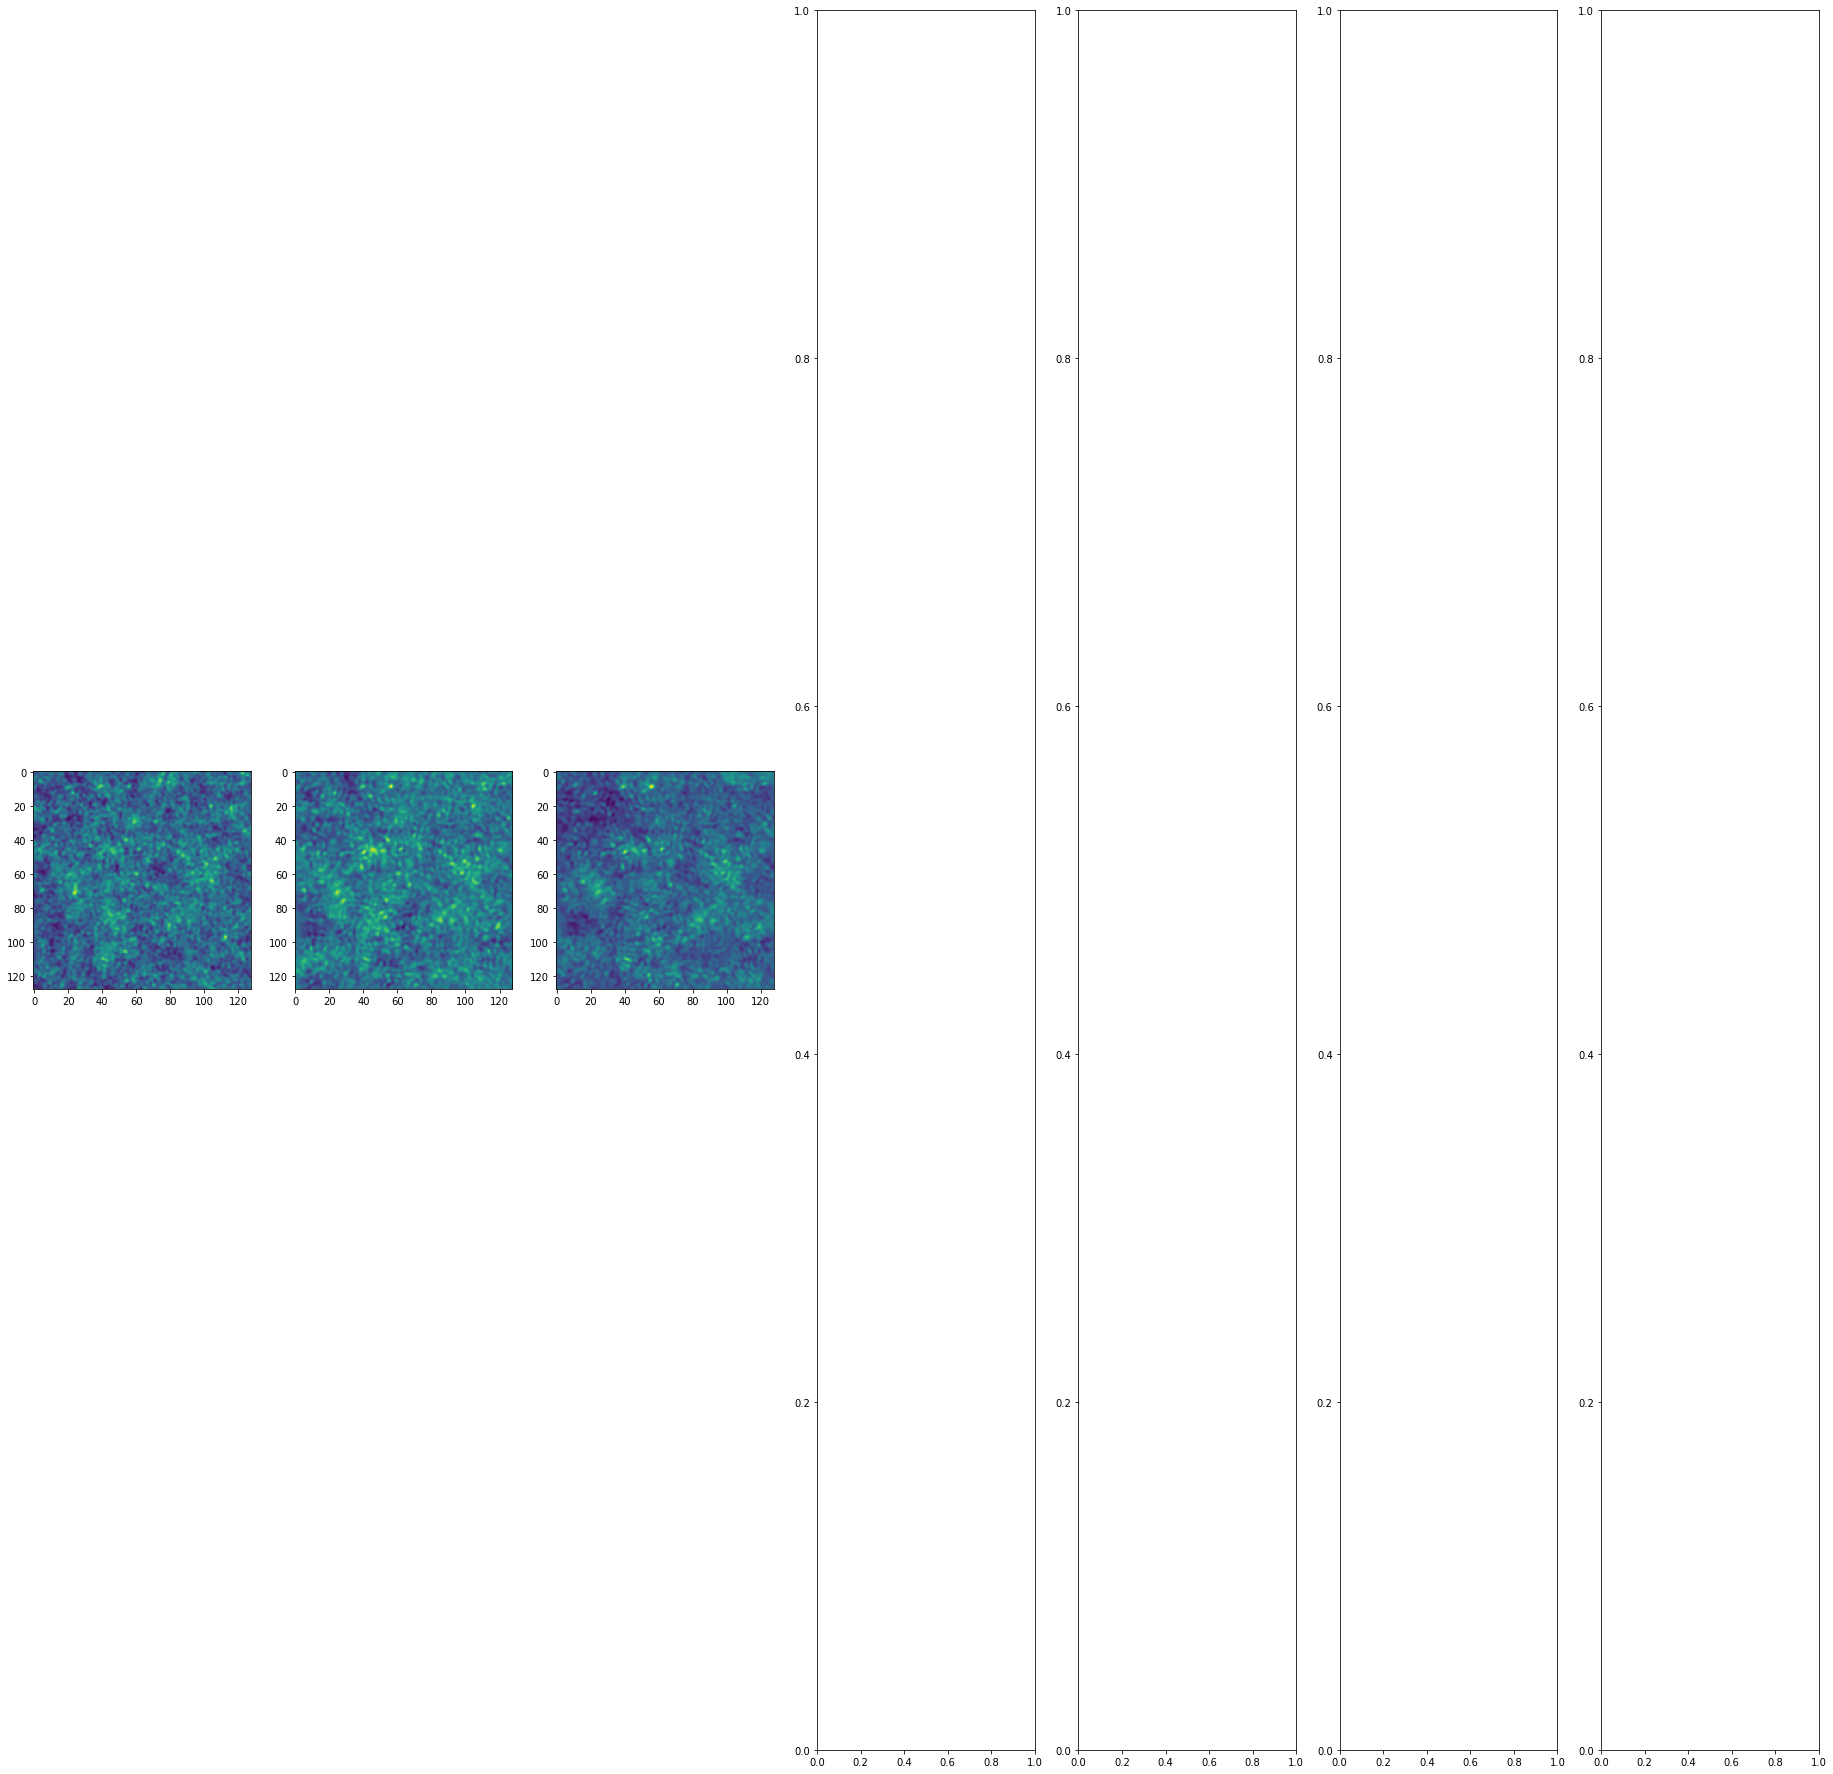

In [ ]:
fig, ax = plt.subplots(1, 7, figsize = (32,32))

idx = 4758
ax[0].imshow(y_test_uncentered[idx])

ax[1].imshow(y_pred_puncentered[idx])
ax[2].imshow(y_pred_runcentered[idx])

## Generate Power Spectra


In [ ]:
# Define ell bins
bins = 30

# Define number of bootstrap folds
folds = 5000
size = int(5000/folds)

# Define Geometry
oshape, owcs = maps.rect_geometry(width_arcmin=128, px_res_arcmin=1)

# Define Bin Edges
bin_edges = np.linspace(100, 7000, bins)

# Taper kappa maps at edges to avoid problems
taper, w2 = maps.get_taper(oshape, owcs)

lbin, _ = maps.binned_power(ndmap(y_pred_ppure[0, :, :], owcs), bin_edges=bin_edges)

clbin_pred_rpure = np.zeros((folds,bins-1))
clbin_pred_ppure = np.zeros((folds,bins-1))

clbin_pred_pnoised = np.zeros((folds,bins-1))
clbin_pred_rnoised = np.zeros((folds,bins-1))

clbin_pred_p5uk = np.zeros((folds,bins-1))
clbin_pred_r5uk = np.zeros((folds,bins-1))

clbin_pred_puncentered = np.zeros((folds,bins-1))
clbin_pred_runcentered = np.zeros((folds,bins-1))

clbin_test = np.zeros((folds,bins-1))

# Bootstrap Through folds
for i in range(folds):
  rpure_i = y_pred_rpure[i*size:(i+1)*size]
  ppure_i = y_pred_ppure[i*size:(i+1)*size]

  rnoised_i = y_pred_rnoised[i*size:(i+1)*size]
  pnoised_i = y_pred_pnoised[i*size:(i+1)*size]

  r5uk_i = y_pred_r5uk[i*size:(i+1)*size]
  p5uk_i = y_pred_p5uk[i*size:(i+1)*size]

  runcentered_i = y_pred_runcentered[i*size:(i+1)*size]
  puncentered_i = y_pred_puncentered[i*size:(i+1)*size]

  test_i = y_test[i*size:(i+1)*size]

  # Iterate through each bootstrap fold
  for j in range(size):
    map_pred_rpure = ndmap(rpure_i[j, :, :], owcs)*taper
    map_pred_ppure = ndmap(ppure_i[j, :, :], owcs)*taper

    map_pred_rnoised = ndmap(rnoised_i[j, :, :], owcs)*taper
    map_pred_pnoised = ndmap(pnoised_i[j, :, :], owcs)*taper

    map_pred_r5uk = ndmap(r5uk_i[j, :, :], owcs)*taper
    map_pred_p5uk = ndmap(p5uk_i[j, :, :], owcs)*taper

    map_pred_runcentered = ndmap(runcentered_i[j, :, :], owcs)*taper
    map_pred_puncentered = ndmap(puncentered_i[j, :, :], owcs)*taper

    map_test = ndmap(test_i[j, :, :], owcs)*taper

    # Bin power spectrum using orphics package for each type of input and for test
    clbin_pred_rpure[i,:] += maps.binned_power(map_pred_rpure, bin_edges=bin_edges)[1]
    clbin_pred_ppure[i,:] += maps.binned_power(map_pred_ppure, bin_edges=bin_edges)[1]
  
    clbin_pred_rnoised[i,:] += maps.binned_power(map_pred_rnoised, bin_edges=bin_edges)[1]
    clbin_pred_pnoised[i,:] += maps.binned_power(map_pred_pnoised, bin_edges=bin_edges)[1]
  
    clbin_pred_r5uk[i,:] += maps.binned_power(map_pred_r5uk, bin_edges=bin_edges)[1]
    clbin_pred_p5uk[i,:] += maps.binned_power(map_pred_p5uk, bin_edges=bin_edges)[1]

    clbin_pred_runcentered[i,:] += maps.binned_power(map_pred_runcentered, bin_edges=bin_edges)[1]
    clbin_pred_puncentered[i,:] += maps.binned_power(map_pred_puncentered, bin_edges=bin_edges)[1]
  
    clbin_test[i,:] += maps.binned_power(map_test, bin_edges=bin_edges)[1]

  # Normalize
  clbin_pred_rpure[i,:] /= size
  clbin_pred_ppure[i,:] /= size

  clbin_pred_rnoised[i,:] /= size
  clbin_pred_pnoised[i,:] /= size

  clbin_pred_r5uk[i,:] /= size
  clbin_pred_p5uk[i,:] /= size

  clbin_pred_runcentered[i,:] /= size
  clbin_pred_puncentered[i,:] /= size

  clbin_test[i,:] /= size

In [ ]:
# Average Power Spectra across 50 folds
clbin_rpure_avg = np.average(clbin_pred_rpure,axis=0)
clbin_ppure_avg = np.average(clbin_pred_ppure,axis=0)
clbin_rnoised_avg = np.average(clbin_pred_rnoised,axis=0)
clbin_pnoised_avg = np.average(clbin_pred_pnoised,axis=0)
clbin_r5uk_avg = np.average(clbin_pred_r5uk,axis=0)
clbin_p5uk_avg = np.average(clbin_pred_p5uk,axis=0)
clbin_runcentered_avg = np.average(clbin_pred_runcentered,axis=0)
clbin_puncentered_avg = np.average(clbin_pred_puncentered,axis=0)
clbin_test_avg = np.average(clbin_test,axis=0)

In [ ]:
# Averaged standard deviation / power spectra per bin
rpure_avgs = np.std(clbin_pred_rpure,axis=0)/np.average(clbin_pred_rpure,axis=0)
ppure_avgs = np.std(clbin_pred_ppure,axis=0)/np.average(clbin_pred_ppure,axis=0)
rnoised_avgs = np.std(clbin_pred_rnoised,axis=0)/np.average(clbin_pred_rnoised,axis=0)
pnoised_avgs = np.std(clbin_pred_pnoised,axis=0)/np.average(clbin_pred_pnoised,axis=0)
r5uk_avgs = np.std(clbin_pred_r5uk,axis=0)/np.average(clbin_pred_r5uk,axis=0)
p5uk_avgs = np.std(clbin_pred_p5uk,axis=0)/np.average(clbin_pred_p5uk,axis=0)
runcentered_avgs = np.std(clbin_pred_runcentered,axis=0)/np.average(clbin_pred_runcentered,axis=0)
puncentered_avgs = np.std(clbin_pred_puncentered,axis=0)/np.average(clbin_pred_puncentered,axis=0)

In [ ]:
# Print average standard deviation / average power spectra
print(np.average(rpure_avgs))
print(np.average(ppure_avgs))
print(np.average(rnoised_avgs))
print(np.average(pnoised_avgs))
print(np.average(r5uk_avgs))
print(np.average(p5uk_avgs))
print(np.average(runcentered_avgs))
print(np.average(puncentered_avgs))

0.12817730124136587
0.13024013023484984
0.13098069067748774
0.12496085196288388
0.12307765381714166
0.11753452421817587
0.12788876697336177
0.12450354386784046


Text(0.5, 1.0, 'Power Spectra, Off-Centered')

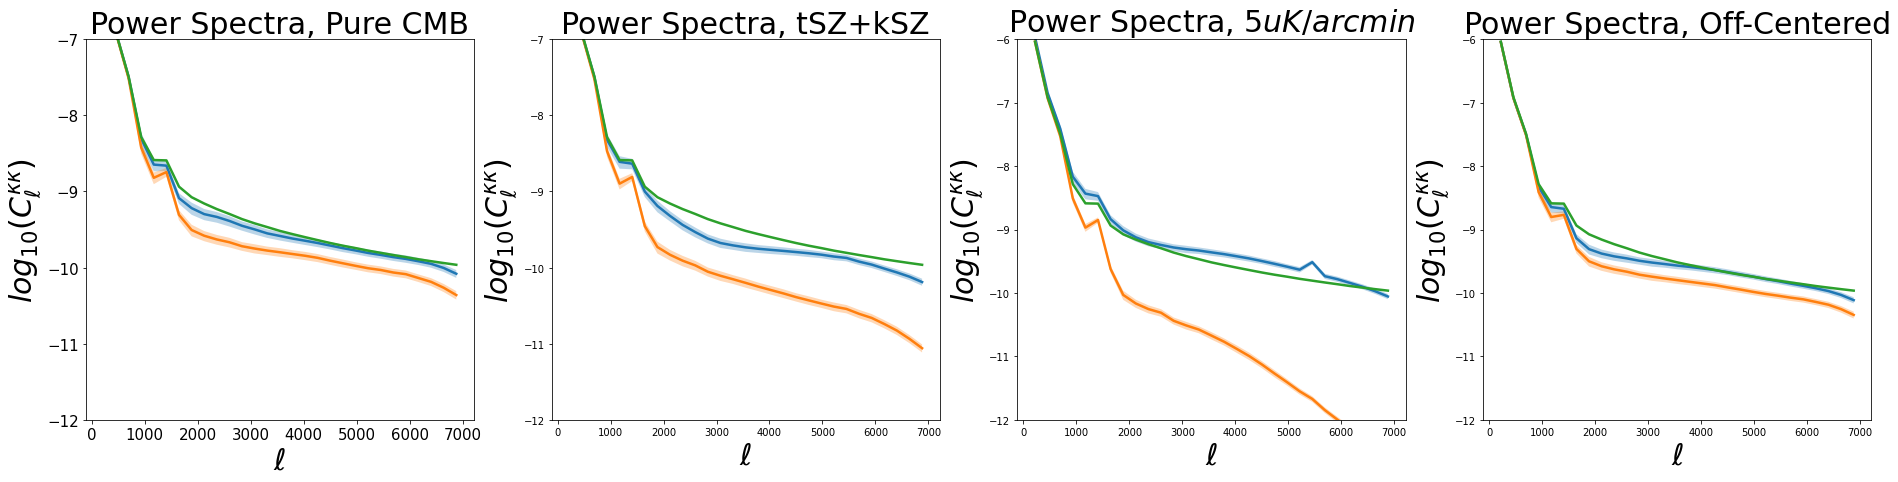

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(32,7))

ax[0].plot(lbin, np.log10(clbin_ppure_avg), label='Pix2Pix, $\hat{\kappa}$', linewidth=2.5)
ax[0].fill_between(lbin, np.log10(clbin_ppure_avg*(1-ppure_avgs)), np.log10(clbin_ppure_avg*(1+ppure_avgs)), alpha=0.3)
ax[0].plot(lbin, np.log10(clbin_rpure_avg), label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[0].fill_between(lbin, np.log10(clbin_rpure_avg*(1-rpure_avgs)), np.log10(clbin_rpure_avg*(1+rpure_avgs)), alpha=0.3)
ax[0].plot(lbin, np.log10(clbin_test_avg), label='Ground Truth, $\kappa$', linewidth=2.5)
ax[0].set_ylabel(r"$log_{10}(C_{\ell}^{\kappa \kappa})$", fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].set_ylim(-12, -7)
ax[0].set_xlabel(r"$\ell$", fontsize=30)
ax[0].set_title(r"Power Spectra, Pure CMB", fontsize=30)

ax[1].plot(lbin, np.log10(clbin_pnoised_avg), label='Pix2Pix, $\hat{\kappa}$', linewidth=2.5)
ax[1].fill_between(lbin, np.log10(clbin_pnoised_avg*(1-pnoised_avgs)), np.log10(clbin_pnoised_avg*(1+pnoised_avgs)), alpha=0.3)
ax[1].plot(lbin, np.log10(clbin_rnoised_avg), label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[1].fill_between(lbin, np.log10(clbin_rnoised_avg*(1-rnoised_avgs)), np.log10(clbin_rnoised_avg*(1+rnoised_avgs)), alpha=0.3)
ax[1].plot(lbin, np.log10(clbin_test_avg), label='Ground Truth, $\kappa$', linewidth=2.5)
ax[1].set_ylabel(r"$log_{10}(C_{\ell}^{\kappa \kappa})$", fontsize=30)
ax[1].set_ylim(-12, -7)
ax[1].set_xlabel(r"$\ell$", fontsize=30)
ax[1].set_title(r"Power Spectra, tSZ+kSZ", fontsize=30)

ax[2].plot(lbin, np.log10(clbin_p5uk_avg), label='cGAN, $\hat{\kappa}$', linewidth=2.5)
ax[2].fill_between(lbin, np.log10(clbin_p5uk_avg*(1-p5uk_avgs)), np.log10(clbin_p5uk_avg*(1+p5uk_avgs)), alpha=0.3)
ax[2].plot(lbin, np.log10(clbin_r5uk_avg), label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[2].fill_between(lbin, np.log10(clbin_r5uk_avg*(1-r5uk_avgs)), np.log10(clbin_r5uk_avg*(1+r5uk_avgs)), alpha=0.3)
ax[2].plot(lbin, np.log10(clbin_test_avg), label='Ground Truth, $\kappa$', linewidth=2.5)
ax[2].set_ylabel(r"$log_{10}(C_{\ell}^{\kappa \kappa})$", fontsize=30)
ax[2].set_ylim(-12, -6)
ax[2].set_xlabel(r"$\ell$", fontsize=30)
ax[2].set_title(r"Power Spectra, $5uK/arcmin$", fontsize=30)

ax[3].plot(lbin, np.log10(clbin_puncentered_avg), label='cGAN, $\hat{\kappa}$', linewidth=2.5)
ax[3].fill_between(lbin, np.log10(clbin_puncentered_avg*(1-puncentered_avgs)), np.log10(clbin_puncentered_avg*(1+puncentered_avgs)), alpha=0.3)
ax[3].plot(lbin, np.log10(clbin_runcentered_avg), label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[3].fill_between(lbin, np.log10(clbin_runcentered_avg*(1-runcentered_avgs)), np.log10(clbin_runcentered_avg*(1+runcentered_avgs)), alpha=0.3)
ax[3].plot(lbin, np.log10(clbin_test_avg), label='Ground Truth, $\kappa$', linewidth=2.5)
ax[3].set_ylabel(r"$log_{10}(C_{\ell}^{\kappa \kappa})$", fontsize=30)
ax[3].set_ylim(-12, -6)
ax[3].set_xlabel(r"$\ell$", fontsize=30)
ax[3].set_title(r"Power Spectra, Off-Centered", fontsize=30)

(0.0, 2.0)

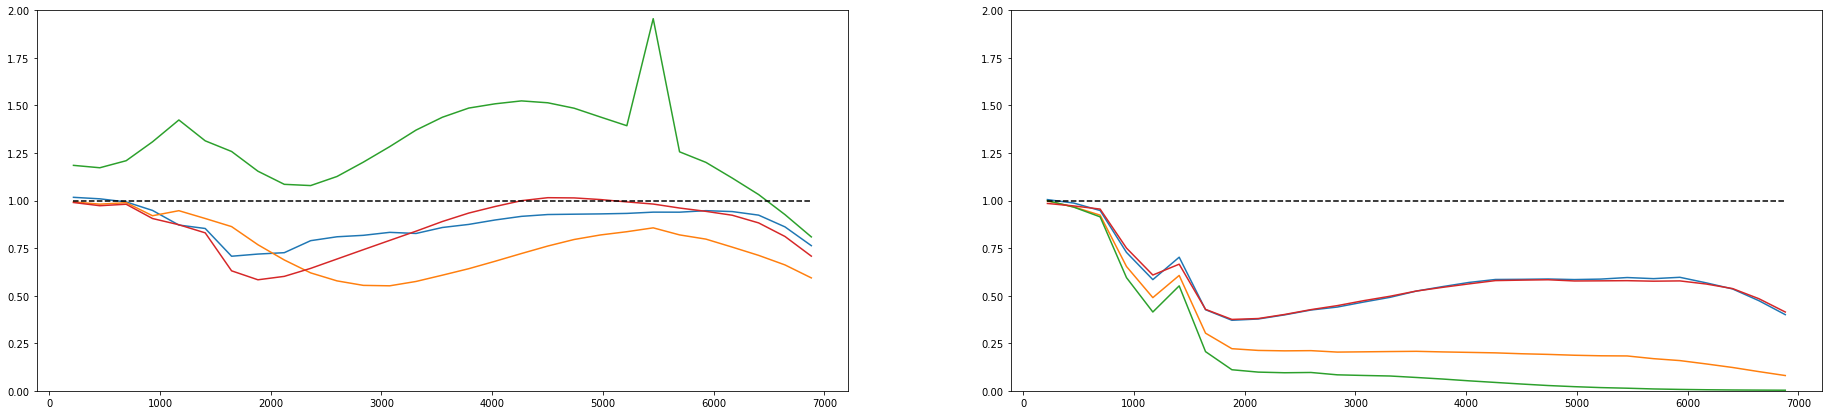

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(32,7))

ax[0].plot(lbin, np.abs(clbin_ppure_avg)/clbin_test_avg, label='Pix2Pix, $\hat{\kappa}$')
ax[0].plot(lbin, np.abs(clbin_pnoised_avg)/clbin_test_avg, label='ResUNet, $\hat{\kappa}$')
ax[0].plot(lbin, np.abs(clbin_p5uk_avg)/clbin_test_avg, label='ResUNet, $\hat{\kappa}$')
ax[0].plot(lbin, np.abs(clbin_puncentered_avg)/clbin_test_avg, label='ResUNet, $\hat{\kappa}$')
ax[0].plot(lbin, np.ones(lbin.shape[0]), color='black', linestyle='dashed')
ax[0].set_ylim(0, 2)

ax[1].plot(lbin, np.abs(clbin_rpure_avg)/clbin_test_avg, label='Pix2Pix, $\hat{\kappa}$')
ax[1].plot(lbin, np.abs(clbin_rnoised_avg)/clbin_test_avg, label='ResUNet, $\hat{\kappa}$')
ax[1].plot(lbin, np.abs(clbin_r5uk_avg)/clbin_test_avg, label='ResUNet, $\hat{\kappa}$')
ax[1].plot(lbin, np.abs(clbin_runcentered_avg)/clbin_test_avg, label='ResUNet, $\hat{\kappa}$')
ax[1].plot(lbin, np.ones(lbin.shape[0]), color='black', linestyle='dashed')
ax[1].set_ylim(0, 2)

## Generate 1-Point PDFs

In [ ]:
bins_ppure, counts_ppure = np.histogram(y_pred_ppure.flatten(), np.arange(0, 1, 0.01), density=True)
bins_rpure, counts_rpure = np.histogram(y_pred_rpure.flatten(), np.arange(0, 1, 0.01), density=True)
bins_pnoised, counts_pnoised = np.histogram(y_pred_pnoised.flatten(), np.arange(0, 1, 0.01), density=True)
bins_rnoised, counts_rnoised = np.histogram(y_pred_rnoised.flatten(), np.arange(0, 1, 0.01), density=True)
bins_p5uk, counts_p5uk = np.histogram(y_pred_p5uk.flatten(), np.arange(0, 1, 0.01), density=True)
bins_r5uk, counts_r5uk = np.histogram(y_pred_r5uk.flatten(), np.arange(0, 1, 0.01), density=True)
bins_puncentered, counts_puncentered = np.histogram(y_pred_puncentered.flatten(), np.arange(0, 1, 0.01), density=True)
bins_runcentered, counts_runcentered = np.histogram(y_pred_runcentered.flatten(), np.arange(0, 1, 0.01), density=True)

bins2, counts2 = np.histogram(y_test.flatten(), np.arange(0, 1, 0.01), density=True)

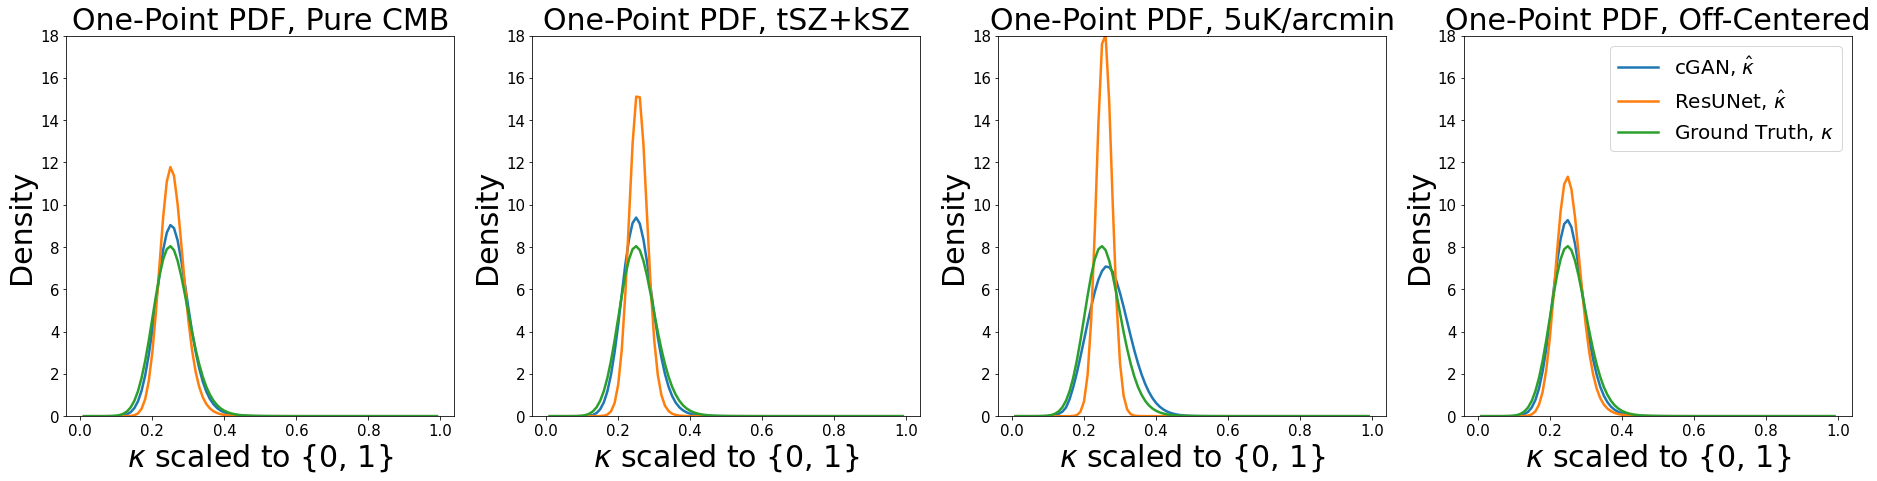

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(32,7))

ax[0].plot(counts_ppure[1:], bins_ppure, label='Pix2Pix, $\hat{\kappa}$', linewidth=2.5)
ax[0].plot(counts_rpure[1:], bins_rpure, label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[0].plot(counts2[1:], bins2, label='Ground Truth, $\kappa$', linewidth=2.5)
ax[0].set_xlabel('$\kappa$ scaled to {0, 1}', fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].set_ylabel('Density', fontsize=30)
ax[0].set_ylim(0,18)
ax[0].set_title('One-Point PDF, Pure CMB', fontsize=30)

ax[1].plot(counts_pnoised[1:], bins_pnoised, label='Pix2Pix, $\hat{\kappa}$', linewidth=2.5)
ax[1].plot(counts_rnoised[1:], bins_rnoised, label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[1].plot(counts2[1:], bins2, label='Ground Truth, $\kappa$', linewidth=2.5)
ax[1].set_xlabel('$\kappa$ scaled to {0, 1}', fontsize=30)
ax[1].set_ylabel('Density', fontsize=30)
ax[1].set_ylim(0,18)
ax[1].set_title('One-Point PDF, tSZ+kSZ', fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

ax[2].plot(counts_p5uk[1:], bins_p5uk, label='cGAN, $\hat{\kappa}$', linewidth=2.5)
ax[2].plot(counts_r5uk[1:], bins_r5uk, label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[2].plot(counts2[1:], bins2, label='Ground Truth, $\kappa$', linewidth=2.5)
ax[2].set_xlabel('$\kappa$ scaled to {0, 1}', fontsize=30)
ax[2].set_ylabel('Density', fontsize=30)
ax[2].set_title('One-Point PDF, 5uK/arcmin', fontsize=30)
ax[2].set_ylim(0,18)
ax[2].tick_params(axis='both', which='major', labelsize=15)

ax[3].plot(counts_puncentered[1:], bins_puncentered, label='cGAN, $\hat{\kappa}$', linewidth=2.5)
ax[3].plot(counts_runcentered[1:], bins_runcentered, label='ResUNet, $\hat{\kappa}$', linewidth=2.5)
ax[3].plot(counts2[1:], bins2, label='Ground Truth, $\kappa$', linewidth=2.5)
ax[3].set_xlabel('$\kappa$ scaled to {0, 1}', fontsize=30)
ax[3].set_ylabel('Density', fontsize=30)
ax[3].set_title('One-Point PDF, Off-Centered', fontsize=30)
ax[3].tick_params(axis='both', which='major', labelsize=15)
ax[3].set_ylim(0,18)
ax[3].legend(fontsize=20)

# Unused Code

In [ ]:
bins = 30
folds = 500
size = int(5000/folds)

oshape, owcs = maps.rect_geometry(width_arcmin=128, px_res_arcmin=1)
bin_edges = np.linspace(100, 7000, bins)
taper, w2 = maps.get_taper(oshape, owcs)

lbin, _ = maps.binned_power(ndmap(y_pred_ppure[0, :, :], owcs), bin_edges=bin_edges)

clbin_cross_ppure = np.zeros((folds,bins-1))
clbin_cross_rpure = np.zeros((folds,bins-1))

clbin_cross_pnoised = np.zeros((folds,bins-1))
clbin_cross_rnoised = np.zeros((folds,bins-1))

clbin_cross_p5uk = np.zeros((folds,bins-1))
clbin_cross_r5uk = np.zeros((folds,bins-1))

clbin_cross_puncentered = np.zeros((folds,bins-1))
clbin_cross_runcentered = np.zeros((folds,bins-1))


for i in range(folds):
  rpure_i = y_pred_rpure[i*size:(i+1)*size]
  ppure_i = y_pred_ppure[i*size:(i+1)*size]

  rnoised_i = y_pred_rnoised[i*size:(i+1)*size]
  pnoised_i = y_pred_pnoised[i*size:(i+1)*size]

  r5uk_i = y_pred_r5uk[i*size:(i+1)*size]
  p5uk_i = y_pred_p5uk[i*size:(i+1)*size]

  runcentered_i = y_pred_runcentered[i*size:(i+1)*size]
  puncentered_i = y_pred_puncentered[i*size:(i+1)*size]

  test_i = y_test[i*size:(i+1)*size]

  for j in range(size):
    map_pred_rpure = ndmap(rpure_i[j, :, :], owcs)*taper
    map_pred_ppure = ndmap(ppure_i[j, :, :], owcs)*taper

    map_pred_rnoised = ndmap(rnoised_i[j, :, :], owcs)*taper
    map_pred_pnoised = ndmap(pnoised_i[j, :, :], owcs)*taper

    map_pred_r5uk = ndmap(r5uk_i[j, :, :], owcs)*taper
    map_pred_p5uk = ndmap(p5uk_i[j, :, :], owcs)*taper

    map_pred_runcentered = ndmap(runcentered_i[j, :, :], owcs)*taper
    map_pred_puncentered = ndmap(puncentered_i[j, :, :], owcs)*taper

    map_test = ndmap(test_i[j, :, :], owcs)*taper
    clbin_test = maps.binned_power(map_test, bin_edges=bin_edges)[1]

    clbin_cross_ppure[i,:] += maps.binned_power(map_pred_ppure-map_test, bin_edges=bin_edges)[1]/clbin_test
    clbin_cross_rpure[i,:] += maps.binned_power(map_pred_rpure-map_test, bin_edges=bin_edges)[1]/clbin_test
    clbin_cross_pnoised[i,:] += maps.binned_power(map_pred_pnoised-map_test, bin_edges=bin_edges)[1]/clbin_test
    clbin_cross_rnoised[i,:] += maps.binned_power(map_pred_rnoised-map_test, bin_edges=bin_edges)[1]/clbin_test
    clbin_cross_p5uk[i,:] += maps.binned_power(map_pred_p5uk-map_test, bin_edges=bin_edges)[1]/clbin_test
    clbin_cross_r5uk[i,:] += maps.binned_power(map_pred_r5uk-map_test, bin_edges=bin_edges)[1]/clbin_test
    #clbin_cross_puncentered[i,:] += maps.binned_power(map_pred_puncentered, imap2=map_test, bin_edges=bin_edges)[1]/np.sqrt(maps.binned_power(map_pred_puncentered, bin_edges=bin_edges)[1] * clbin_test)
    #clbin_cross_runcentered[i,:] += maps.binned_power(map_pred_runcentered, imap2=map_test, bin_edges=bin_edges)[1]/np.sqrt(maps.binned_power(map_pred_runcentered, bin_edges=bin_edges)[1] * clbin_test)
  
  clbin_cross_ppure[i,:] /= size
  clbin_cross_rpure[i,:] /= size
  clbin_cross_pnoised[i,:] /= size
  clbin_cross_rnoised[i,:] /= size
  clbin_cross_p5uk[i,:] /= size
  clbin_cross_r5uk[i,:] /= size
  clbin_cross_puncentered[i,:] /= size
  clbin_cross_runcentered[i,:] /= size

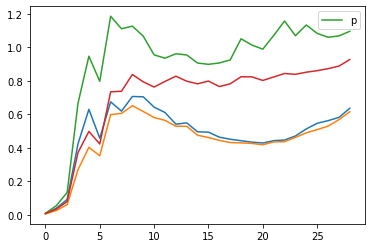

In [ ]:
plt.plot(clbin_cross_ppure[0])
plt.plot(clbin_cross_rpure[0])
plt.plot(clbin_cross_pnoised[0], label='p')
plt.plot(clbin_cross_rnoised[0])
#plt.plot(clbin_cross_p5uk[0])
#plt.plot(clbin_cross_r5uk[0])
plt.legend()